<a href="https://colab.research.google.com/github/SnehaKumar295/WINTERSEM_NLP_17bit0084/blob/master/nlpProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded=files.upload()

Saving fooodreviews.csv to fooodreviews.csv


In [0]:
import pandas as pd;
import io;
import numpy as np;

In [0]:
data = pd.read_csv(io.BytesIO(uploaded['fooodreviews.csv']))

In [0]:
data.shape

(9999, 4)

In [0]:
data.head()

,Summary,Text,Unnamed: 2,Unnamed: 3
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,NaN,NaN
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,NaN
2,"""Delight"" says it all",This is a confection that has been around a fe...,NaN,NaN
3,Cough Medicine,If you are looking for the secret ingredient i...,NaN,NaN
4,Great taffy,Great taffy at a great price. There was a wid...,NaN,NaN


In [0]:
data=data.dropna(1)
data.head()

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...


In [0]:
data.shape


(9999, 2)

In [0]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [0]:
import re
import nltk
from bs4 import BeautifulSoup
nltk.download('stopwords')
from nltk.corpus import stopwords
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text,removestopwords):
    text = text.lower();
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text=BeautifulSoup(text,"lxml").text
    text = re.sub(r"'s\b","",text)
    text = re.sub(r'\'', ' ', text)
    text = REPLACE_BY_SPACE_RE.sub(" ",text);
    text =BAD_SYMBOLS_RE.sub("",text);
    text=' '.join(contractions[word] if word in contractions else word for word in text.split(" "))
    if removestopwords==True:
      text = ' '.join(word for word in text.split(" ") if word not in STOPWORDS)
    return text.strip();

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
clean_text=[]
clean_summary=[]
for x in data.Text:
  clean_text.append(text_prepare(x,True));
for y in data.Summary:
  clean_summary.append(text_prepare(y,False));

In [0]:
data['clean_summary']=clean_summary;
data['clean_text']=clean_text;
data['clean_summary']=data['clean_summary'].apply(lambda x : 'start '+ x + ' end')
data['clean_summary'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

In [0]:
for i in range(105,110):
  print("Text: "+data['clean_text'][i]);
  print("Summary: "+data['clean_summary'][i]);
  print("\n");

Text: like creme brulee loved easy sprinkle sugar came broil look amazing taste great guess thought really went way really took 5 minutes ordering
Summary: start the best end


Text: expecting terms company reputation excellent home delivery products
Summary: start disappointing end


Text: first bought pickled asparagus amish market love first bite hence  saw discount rack local safeway cleaned  even better ones amish market fantastic  jars bonus clove garlic bottom going order six pack household one wont go waste
Summary: start wasting vinegar on a cucumber is a shame end


Text: love asparagus  recently  never pickled asparagus  oh goodness  friend introduced exact brand  believe great stuff tasted  loved much bought six pack  got 2 jars left  gonna need
Summary: start asparagus bliss end


Text: presently diet fresh easy neighborhood grocery looking possible diet foods wanted things tasty  nonfat low calories came home dozen items discovered tillen farms pickled crispy asparagus we

In [0]:
word_count_avg=0;
summary_count_avg=0;
for text in data['clean_text']:
  for word in text.split(" "):
    word_count_avg=word_count_avg+1;
for text in data['clean_summary']:
  for word in text.split(" "):
    summary_count_avg=summary_count_avg+1;
print("word_len ",word_count_avg);
print("summary_len ",summary_count_avg);

word_len  423198
summary_len  62255


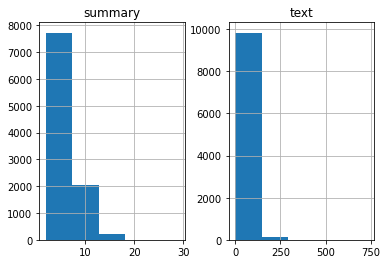

In [0]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['clean_text']:
      text_word_count.append(len(i.split()))

for i in data['clean_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 5)
plt.show()

In [0]:
max_len_text=80
max_len_summary=10

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['clean_text'],data['clean_summary'],test_size=0.1,random_state=0,shuffle=True) 


In [0]:
%tensorflow_version 1.x
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
#dont execute

In [0]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_train))

#convert text sequences into integer sequences
x_train2    =   x_tokenizer.texts_to_sequences(x_train) 
x_test2  =   x_tokenizer.texts_to_sequences(x_test)

#padding zero upto maximum length
x_train2  =   pad_sequences(x_train2,  maxlen=80, padding='post') 
x_test2 =   pad_sequences(x_test2, maxlen=80, padding='post')

x_voc_size2   =  len(x_tokenizer.word_index) +1


[ 225   10    8 1481   45   74    4  316  931 1450  146  436    4    1
   36  316   48   33 1658  885 2976 1956  290   26    9   85  804    9
   20   90 1482    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
husband
love
product
naturally
sweet
without
taste
artificial
sweeteners
peach
flavored
teas
taste
like
sugar
artificial
flavors
drink
wonderfully
watery
quench
thirst
wish
amazon
would
always
sell
would
buy
regular
basis
bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better


In [0]:
import gensim
sentences = [[word for word in document.lower().split()] for document in x_train]
word_model = gensim.models.Word2Vec(sentences, size=500, min_count=1, 
                                    window=2, iter=500)
pretrained_weights = word_model.wv.syn0
x_vocab_size, x_emdedding_size = pretrained_weights.shape
print('Result embedding shape:', pretrained_weights.shape)
print(pretrained_weights[0])
def word2idx(word):
  return word_model.wv.vocab[word].index
def idx2word(idx):
  return word_model.wv.index2word[idx]

#dont execute

Result embedding shape: (23666, 500)
[-1.39153793e-01 -5.19787908e-01 -1.63338947e+00  9.46100116e-01
  9.82965410e-01 -8.76440942e-01  6.77917600e-01 -1.19071417e-01
 -4.21867758e-01 -7.11272180e-01 -1.43821383e+00  9.36144710e-01
  1.12660253e+00 -8.74474347e-01  8.91330719e-01  1.98518455e+00
  1.23754060e+00 -1.45819232e-01  5.94575763e-01  3.37516576e-01
  3.15406844e-02  7.07850680e-02 -9.80770707e-01  3.71698081e-01
  9.89820063e-01  4.30128664e-01 -4.38973427e-01  1.26073813e+00
  2.84113765e-01  1.55834472e+00  5.79412878e-01  1.75296617e+00
 -2.20448509e-01 -2.33699232e-01 -7.42976606e-01 -3.74053150e-01
 -6.17198467e-01 -2.54115343e-01  2.77476370e-01 -1.22745812e+00
  3.44035745e-01 -2.12535083e-01  7.72906959e-01  2.79162582e-02
  5.27375937e-01  5.88271916e-01 -3.03273737e-01 -4.80121881e-01
  8.99458900e-02 -6.19229376e-01 -4.56482202e-01 -7.04582810e-01
  9.39098001e-01 -5.52232683e-01 -4.88623947e-01 -6.83726549e-01
 -5.61254561e-01  4.41113085e-01 -1.20765483e+00 -8.5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """


In [0]:

train_x = np.empty([len(sentences),80], dtype=np.int32)
for i, sentence in enumerate(sentences):
  for t, word in enumerate(sentence):
    if(t<80):
      train_x[i, t] = word2idx(word)
    else:
      break
      #dont execute

In [0]:
word_model.wv.vocab["like"]="like"
print(word2idx('happy'))
 #dont execute

155


In [0]:
ysentences = [[word for word in document.lower().split()] for document in y_train]
yword_model = gensim.models.Word2Vec(ysentences, size=10, min_count=1, 
                                    window=2, iter=500)
y_pretrained_weights = yword_model.wv.syn0
y_vocab_size, y_emdedding_size = y_pretrained_weights.shape
print('Result embedding shape:', y_pretrained_weights.shape)
print(y_pretrained_weights[0])
def yword2idx(word):
  return yword_model.wv.vocab[word].index
def yidx2word(idx):
  return yword_model.wv.index2word[idx]
train_y = np.zeros([len(ysentences),10], dtype=np.int32)
for i, sentence in enumerate(ysentences):
  for t, word in enumerate(sentence):
    if(t<10):
      train_y[i, t] = yword2idx(word)
    else:
      break
       #dont execute

Result embedding shape: (4541, 10)
[-0.06808928  0.35215646 -0.05830133 -0.2514843  -0.06148021 -0.36671737
  0.01730357 -0.70032376 -0.07197349  0.66018736]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


[  0 956  22   1   0   0   0   0   0   0]
delicious
start good quality dog food end


In [0]:
xtestsentences = [[word for word in document.lower().split()] for document in x_test]
xtestword_model = gensim.models.Word2Vec(xtestsentences, size=80, min_count=1, 
                                    window=2, iter=500)
x_pretrained_weights_test = xtestword_model.wv.syn0
x_vocab_size_test, x_emdedding_size_test = x_pretrained_weights_test.shape
print('Result embedding shape:', x_pretrained_weights_test.shape)
print(x_pretrained_weights_test[0])
def xtestword2idx(word):
  return xtestword_model.wv.vocab[word].index
def xtestidx2word(idx):
  return xtestword_model.wv.index2word[idx]
test_x = np.zeros([len(xtestsentences),80], dtype=np.int32)
for i, sentence in enumerate(xtestsentences):
  for t, word in enumerate(sentence):
    if(t<80):
      test_x[i, t] = xtestword2idx(word)  
    else:
      break
       #dont execute

Result embedding shape: (6743, 80)
[-0.3600091  -0.0930389   0.03542021 -0.416248   -0.13877839  0.652481
  2.2145712  -2.7782052   0.38685703  1.0515195  -1.7408068   1.6302123
  0.5710109   1.5724676   0.39857987  0.7230953  -1.3291991  -0.12136909
 -0.75057024 -0.03599088  0.8998468  -1.0320596  -1.6282761  -2.6676822
  0.648063    0.5554326   1.1207932  -1.9570323  -1.5104263   0.38989574
 -1.6547982  -1.6127808  -0.28707486 -0.1355134   0.692633   -0.3581113
 -1.3677521   2.1365345  -0.36545902  0.73173934  0.06054849  1.6504579
 -0.60651135 -0.19220059  1.0163262   0.27239338  2.0256975  -0.92936516
  0.23620445  0.9440492   0.65425587 -0.63635445  0.07572428 -0.38323006
  0.78679466 -0.41384205  0.41408336  1.6880195  -0.06083208  0.6368368
 -1.9274765   0.83058906  1.5661484   1.8130141  -0.16301839 -0.11854655
  1.0471061  -0.82213163  2.0494695  -1.0750214   0.5215858   0.2597999
  0.19317643 -1.005779   -1.3130833   0.04560887 -0.58206695 -0.2687627
 -2.2393692  -1.036786  ]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [0]:
ytestsentences = [[word for word in document.lower().split()] for document in y_test]
ytestword_model = gensim.models.Word2Vec(ytestsentences, size=10, min_count=1, 
                                    window=2, iter=500)
testy_pretrained_weights = ytestword_model.wv.syn0
y_vocab_size_test, y_emdedding_size_test = testy_pretrained_weights.shape
print('Result embedding shape:', testy_pretrained_weights.shape)
print(testy_pretrained_weights[0])
def ytestword2idx(word):
  return ytestword_model.wv.vocab[word].index
def ytestidx2word(idx):
  return ytestword_model.wv.index2word[idx]
test_y = np.zeros([len(ytestsentences),10], dtype=np.int32)
for i, sentence in enumerate(ytestsentences):
  for t, word in enumerate(sentence):
    if(t<10):
      test_y[i, t] = ytestword2idx(word)  
    else:
      break
       #dont execute

Result embedding shape: (1261, 10)
[-0.12568165  0.1600212  -0.28139412  0.39667106  0.24465069 -0.10079971
  0.04692122 -0.3769368   0.18912847  0.45113108]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [0]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

#convert text sequences into integer sequences
y_train2    =   y_tokenizer.texts_to_sequences(y_train) 
y_test2  =   y_tokenizer.texts_to_sequences(y_test)

#padding zero upto maximum length
y_train2   =   pad_sequences(y_train2,  maxlen=max_len_summary, padding='post') 
y_test2   =   pad_sequences(y_test2, maxlen=max_len_summary, padding='post')

y_voc_size   =  len(y_tokenizer.word_index) +1

In [0]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(data['clean_text'],data['clean_summary'],test_size=0.1,random_state=0,shuffle=True) 


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_features(X_train, X_test,maxl):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1,2))
    X_train = tfidf_vectorizer.fit_transform(list(X_train)).toarray()
    X_test = tfidf_vectorizer.transform(X_test).toarray()
    return X_train, X_test, tfidf_vectorizer.vocabulary_

In [0]:
X_train_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(x_train1, x_test1,max_len_text)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [0]:
Y_train_tfidf, Y_test_tfidf, tfidf_vocab_summary = tfidf_features(y_train1, y_test1,max_len_summary)
tfidf_reversed_vocab_summary = {i:word for word,i in tfidf_vocab.items()}

In [0]:
print(Y_train_tfidf);

NameError: ignored

In [0]:

import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [0]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K 
K.clear_session() 
latent_dim = 500
# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size2, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_output3, state_h3, state_c3= encoder_lstm3(encoder_output2) 

#LSTM4
encoder_lstm4=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_output4, state_h4, state_c4= encoder_lstm4(encoder_output3) 

#LSTM5
encoder_lstm5=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm5(encoder_output4)

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 80, 500)      11818000    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 80, 500), (N 2002000     embedding[0][0]                  
_____________________________________________________________________________________________

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [0]:
history=model.fit([x_train2,y_train2[:,:-1]], y_train2.reshape(y_train2.shape[0],y_train2.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_test2,y_test2[:,:-1]], y_test2.reshape(y_test2.shape[0],y_test2.shape[1], 1)[:,1:]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8999 samples, validate on 1000 samples
Epoch 1/50
8999/8999 [==============================] - 60s 7ms/sample - loss: 3.4432 - val_loss: 2.7861
Epoch 2/50
8999/8999 [==============================] - 46s 5ms/sample - loss: 2.8920 - val_loss: 2.7269
Epoch 3/50
8999/8999 [==============================] - 46s 5ms/sample - loss: 2.7756 - val_loss: 2.6721
Epoch 4/50
8999/8999 [==============================] - 46s 5ms/sample - loss: 2.6556 - val_loss: 2.5596
Epoch 5/50
8999/8999 [==============================] - 46s 5ms/sample - loss: 2.5302 - val_loss: 2.5026
Epoch 6/50
8999/8999 [==============================] - 46s 5ms/sample - loss: 2.4134 - val_loss: 2.4530
Epoch 7/50
8999/8999 [==============================] - 46s 5ms/sample - loss: 2.3012 - val_loss: 2.4105
Epoch 8/50
8999/8999 [==============================] - 46s 5ms/sample - loss: 2.1925 - val_loss: 2.3791
Epoch 9/50
8999/89

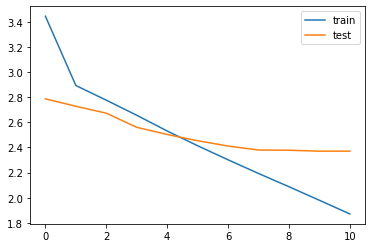

In [0]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [0]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [0]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    decode_sen_sequence=[]
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
          stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [0]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [0]:
for i in range(89,93):
  print('Review:',seq2text(x_test2[i]))
  print('Original summary:',seq2summary(y_test2[i]))
  print('Predicted summary:',decode_sequence(x_test2[i].reshape(1,max_len_text)))
  print('\n')

Review: spread right costs six dollars shipping ridiculous 
Original summary: great but expensive here 
Predicted summary:  not impressed


Review: russian descent eating buckwheat entire life live us usually buy buckwheat local russian eastern european stores first last time tried buckwheat things found 1 takes 1012 min cook normally takes min item instant buckwheat 2 tastes quite different usual 3 strong metallic smell 4 item overpriced go closest russian eastern european shop buy thing 4 times cheaper 
Original summary: 
Predicted summary:  very disappointed


Review: wife switched dogs food 4 months ago virtually gone daily week dogs hardly shed anymore brushing needed coats soft shiny used grain free foods previously liked one definitely best tried pricey able feed 1 2 using foods still maintain weight food well worth price dogs love 
Original summary: no more 
Predicted summary:  great product


Review: short brief product wonderful coconut taste pineapple addition light mildly s

In [0]:
 from math import log
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h_init, e_c_init = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = []
    prev_h={}
    prev_c={}
    # Chose the 'start' word as the first word of the target sequence
    target_seq.append(target_word_index['start'])
    prev_h[target_word_index['start']]=e_h_init
    prev_c[target_word_index['start']]=e_c_init
    stop_condition = False
    sequences=[[[],1.0]];
    #print(sequences)
    while not stop_condition:
      if(len(target_seq)==0):
        stop_condition=True;
        break;
      all_candidates=list()
      e_h={}
      e_c={}
      s=list()
      for k in range(len(target_seq)):
        t=np.zeros((1,1))
        t[0,0]=target_seq[k]
        output_tokens, h, c = decoder_model.predict([t] + [e_out, prev_h[target_seq[k]], prev_c[target_seq[k]]])
        for i in range(0,len(sequences)):
          #print()
          seq,score=sequences[i]
          #print(seq)
          for j in range(1,len(output_tokens[0,-1,:])):
            candidate=[seq+[1+j],score*-log(output_tokens[0,-1,j])]
            all_candidates.append(candidate)
              #print(candidate)
            e_h[1+j]=h
            e_c[1+j]=c
      all2=sorted(all_candidates,key=lambda tup:tup[1])
      sequences=all2[:2]
      #print(sequences)
      target_seq=[]
      prev_h={}
      prev_c={}
      for l in range(len(sequences)):
        seq,score=sequences[l]
        if(len(seq)!=0 and len(seq)<10 and seq[len(seq)-1]!='end'):
          target_seq.append(seq[len(seq)-1])
          prev_h[seq[len(seq)-1]]=e_h[seq[len(seq)-1]]
          prev_c[seq[len(seq)-1]]=e_c[seq[len(seq)-1]]
      #print(prev_h)
    seq,a=sequences[0]
    #print("jj",seq)
    decoded=''
    for m in range(len(seq)-1):
      decoded+=" "+reverse_target_word_index[seq[m]]
    return decoded

In [0]:
for i in range(89,99):
  print('Review:',seq2text(x_test2[i]))
  print('Original summary:',seq2summary(y_test2[i]))
  print('Predicted summary:',decode_sequence(x_test2[i].reshape(1,max_len_text)))
  print('\n')

Streaming output truncated to the last 5000 lines.
         5.72549641e-01, -5.73154867e-01,  0.00000000e+00,
        -9.24531817e-01, -0.00000000e+00,  7.02131093e-01,
        -9.99994874e-01, -8.81766737e-01, -3.02872151e-01,
         0.00000000e+00, -7.12338924e-01,  6.32742882e-01,
        -0.00000000e+00,  0.00000000e+00, -1.71849266e-01,
        -0.00000000e+00,  4.48361546e-01,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -1.82564855e-02,
        -1.56575255e-02,  1.24278605e-01,  0.00000000e+00,
         2.57156808e-02, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  2.55442798e-01,
        -1.09503628e-03, -1.00000000e+00, -0.00000000e+00,
         5.46757728e-02, -0.00000000e+00,  1.00000000e+00,
        -1.00416817e-01, -5.18724144e-01, -0.00000000e+00,
         5.17572939e-01, -9.32202101e-01,  2.34384194e-01,
         0.00000000e+00,  7.49311328e-01, -5.37189007e-01,
        -0.00000000e+00,  4.08854224e-02, -1.07588349e-02,
     